In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sample_df = pd.read_csv( 'train_sample.csv')

In [3]:
sample_df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


'attributed_time' is the time when it was downloaded so the row that 'is_attributed' is 0 are 'Nan'

In [4]:
sample_df.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


,is_attributed,count
0,0,99773
1,1,227


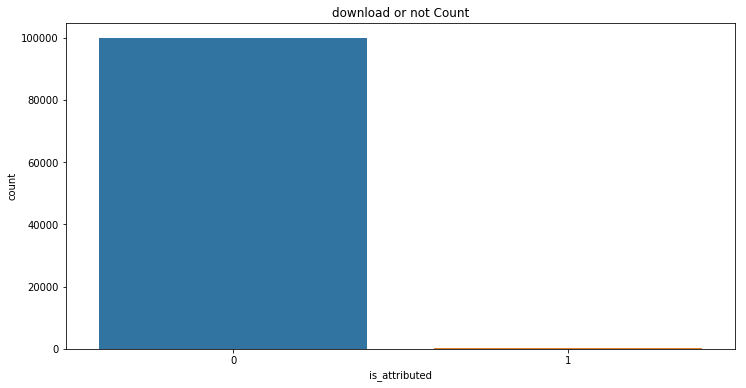

In [5]:
#compare the number of downloaded cases and the number of cases not downloaded after the ads was clicked.
plt.figure(figsize=(12,6))
click_count = sample_df.groupby('is_attributed', as_index=False)['ip'].count()
click_count = click_count.rename(columns ={'ip':'count'})
sns.barplot(x='is_attributed', y='count', data= click_count);
plt.title('download or not Count');
click_count.head()

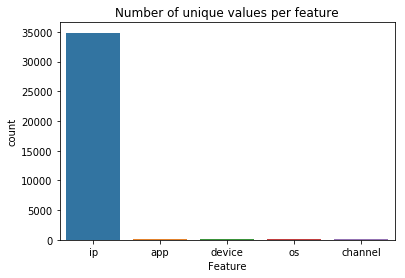

In [6]:
# unique value
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(sample_df[col].unique()) for col in cols]
ax = sns.barplot(cols, uniques)
ax.set(xlabel='Feature', ylabel='count', title='Number of unique values per feature');

# Clicks and downloads per hour and minute

In [7]:
sample_df['click_time_dt']= pd.to_datetime(sample_df['click_time'])
dt= sample_df['click_time_dt'].dt
sample_df['day'] = dt.day.astype('uint8')
sample_df['hour'] = dt.hour.astype('uint8')
sample_df['minute'] = dt.minute.astype('uint8')
dll_df = sample_df[sample_df['is_attributed'] == 1]
not_dll_df = sample_df[sample_df['is_attributed'] == 0]

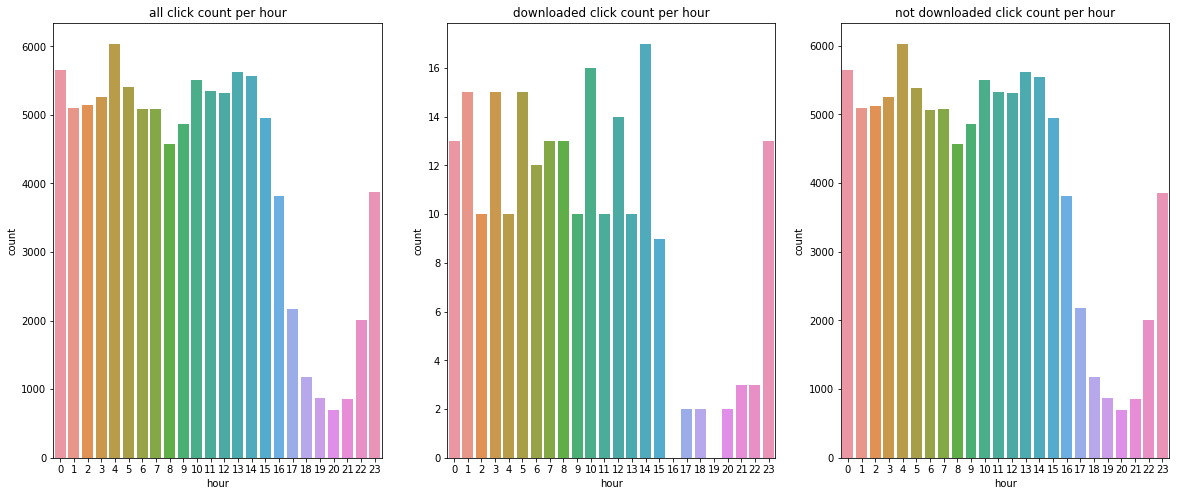

In [8]:
fig ,ax = plt.subplots(1,3, figsize= (20, 8))

sns.countplot(x='hour', data=sample_df, ax=ax[0]);
sns.countplot(x='hour', data=dll_df, order=[i for i in range(24)] , ax=ax[1]);
sns.countplot(x='hour', data=not_dll_df,  ax=ax[2]);
ax[0].set_title('all click count per hour');
ax[1].set_title('downloaded click count per hour');
ax[2].set_title('not downloaded click count per hour');

clicks are commonly falling from 18 to 22 hr

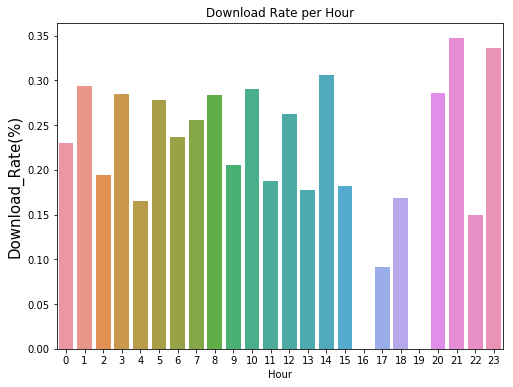

In [9]:
# download rate for the number of clicks per hour
count_per_hour = sample_df.groupby('hour', as_index = False).count()
count_per_hour = count_per_hour[['hour', 'app', 'attributed_time']]
count_per_hour = count_per_hour.rename(columns = {'app': 'click_count', 'attributed_time': 'download_count'})
count_per_hour['download_rate'] = count_per_hour['download_count'] / count_per_hour['click_count'] * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='hour', y='download_rate', data=count_per_hour);
plt.ylabel('Download_Rate(%)', fontsize=15)
plt.xlabel('Hour')
ax.set_title('Download Rate per Hour');

# Correlation between each variable

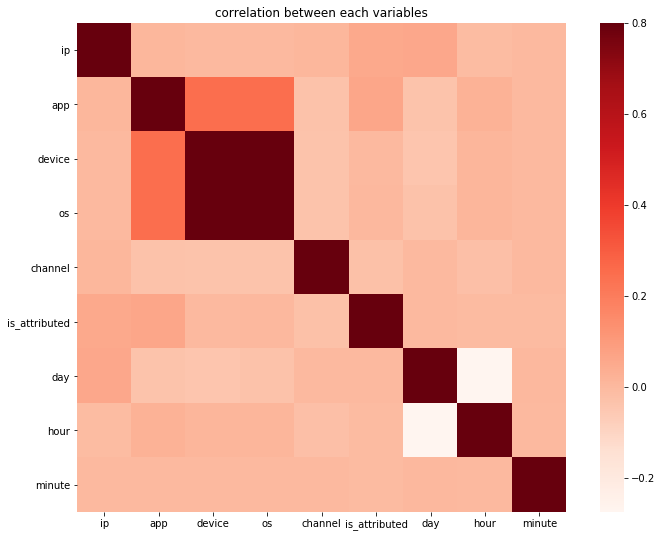

In [10]:
co = sample_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(co, cmap='Reds',vmax=.8, square=True, ax=ax)
ax.set_title("correlation between each variables",);

strong correlation between OS, device, and application

# Clicks on same ip

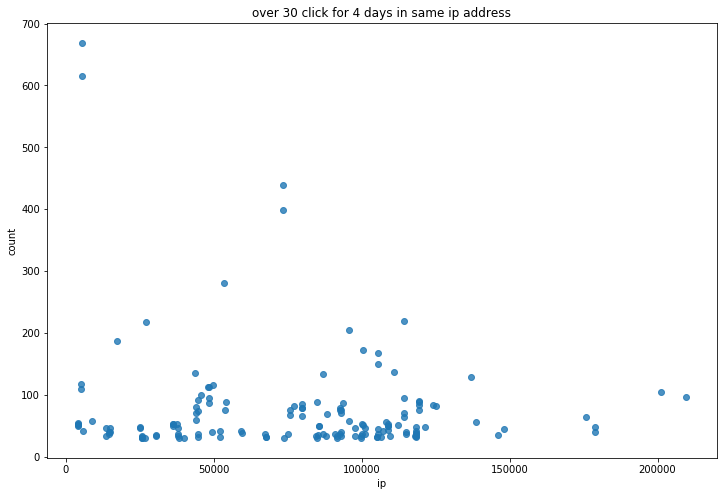

In [11]:
click_ip_count = sample_df.groupby('ip', as_index= False)['device'].aggregate('count').sort_values('device', ascending=False)
click_ip_count = click_ip_count.rename(columns={'device':'count'})
plt.figure(figsize=(12,8))
sns.regplot(x='ip', y='count', fit_reg=False, data=click_ip_count[click_ip_count['count']>29])
plt.title('over 30 click for 4 days in same ip address')
plt.show()

In [12]:
# ranking
ip_click_ranking = sample_df.groupby('ip', as_index = False).count().sort_values(by = 'app', ascending=False)
ip_click_ranking = ip_click_ranking[['ip', 'app']]
ip_click_ranking = ip_click_ranking.rename(columns={'app':'click_count'})
ip_click_ranking.head(10)

,ip,click_count
926,5348,669
918,5314,616
12833,73487,439
12839,73516,399
9385,53454,280
20021,114276,219
4639,26995,218
16703,95766,205
2990,17149,186
17488,100275,173


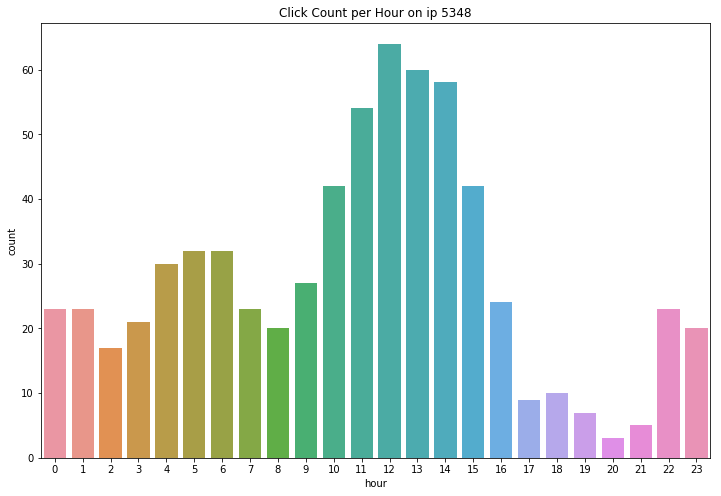

In [13]:
sample_df[sample_df['ip'] == 5348].sort_values(by='click_time', ascending=True)
plt.figure(figsize=(12,8))
sns.countplot(x='hour', data=sample_df[sample_df['ip'] == 5348]);
plt.title('Click Count per Hour on ip 5348')
plt.show()

# THIS GUY IS NOT EVEN SLEEPING

In [14]:
ip_click_download = sample_df.groupby('ip', as_index = False).sum().sort_values(by='app', ascending = False).reset_index()
ip_click_download = ip_click_download[['ip', 'app', 'is_attributed']]
ip_click_download = ip_click_download.rename(columns={'is_attributed': 'download_count', 'app': 'click_count'})
ip_click_download.head(10)

,ip,click_count,download_count
0,5314,10086,3
1,5348,9478,3
2,73487,4809,0
3,73516,4428,0
4,53454,3548,0
5,114276,3243,0
6,26995,3215,0
7,86767,3003,0
8,17149,2993,0
9,105475,2513,0


# clicks on the same device, OS

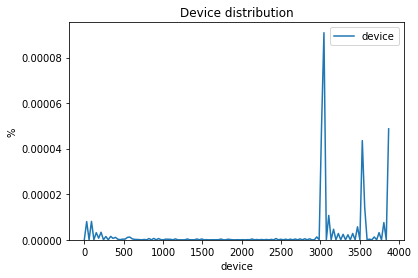

In [15]:
#sns.boxplot(sample_df['device'])
sns.kdeplot(sample_df['device'])
plt.title('Device distribution')
plt.xlabel('device')
plt.ylabel('%')
plt.show()

In [16]:
d_cnt_device = sample_df.groupby('device', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
d_cnt_device = d_cnt_device[['device', 'is_attributed']]
d_cnt_device = d_cnt_device.rename(columns={'is_attributed': 'download_count'})
d_cnt_device.head()

,device,download_count
1,1,146
0,0,52
32,97,3
9,16,3
13,21,2


In [17]:
click_cnt_device = sample_df.groupby('device', as_index=False).count().sort_values(by='app', ascending=False)
click_cnt_device = click_cnt_device[['device', 'app']]
click_cnt_device = click_cnt_device.rename(columns={'app': 'click_count'})
click_cnt_device.head()

,device,click_count
1,1,94338
2,2,4345
0,0,541
93,3032,371
96,3543,151


In [18]:
device_click_download_df = pd.merge(click_cnt_device, d_cnt_device)
device_click_download_df.head()

,device,click_count,download_count
0,1,94338,146
1,2,4345,2
2,0,541,52
3,3032,371,0
4,3543,151,0


In [19]:
device_click_download_df['download_%'] = device_click_download_df['download_count']/ device_click_download_df['click_count'] * 100
device_click_download_df.head(10)

,device,click_count,download_count,download_%
0,1,94338,146,0.154763
1,2,4345,2,0.046030
2,0,541,52,9.611830
3,3032,371,0,0.000000
4,3543,151,0,0.000000
5,3866,93,0,0.000000
6,59,12,0,0.000000
7,6,8,1,12.500000
8,40,7,1,14.285714
9,16,7,3,42.857143


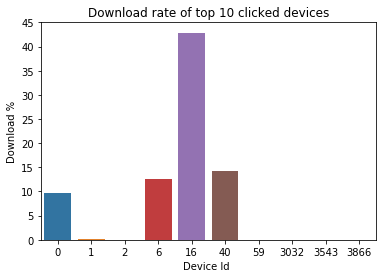

In [20]:
sns.barplot(x='device', y='download_%', data=device_click_download_df[:10])
plt.xlabel("Device Id ")
plt.ylabel("Download %")
plt.title("Download rate of top 10 clicked devices")
plt.show()

devices other then 16, 40, 0 and 6 are not downloading 

# OS

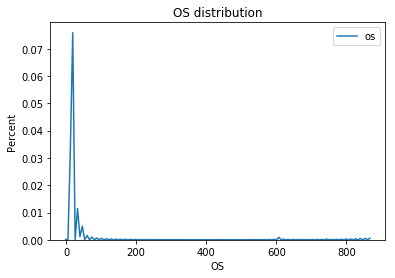

In [21]:
sns.kdeplot(sample_df['os'])
plt.title('OS distribution')
plt.xlabel('OS')
plt.ylabel('Percent')
plt.show()

In [22]:
d_cnt_os = sample_df.groupby('os', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
d_cnt_os = d_cnt_os[['os', 'is_attributed']]
d_cnt_os = d_cnt_os.rename(columns={'is_attributed': 'download_count'})
d_cnt_os.head()

,os,download_count
19,19,41
0,0,26
24,24,26
13,13,25
29,29,11


In [23]:
click_cnt_os = sample_df.groupby('os', as_index=False).count().sort_values(by='app', ascending=False)
click_cnt_os = click_cnt_os[['os', 'app']]
click_cnt_os = click_cnt_os.rename(columns={'app': 'click_count'})
click_cnt_os.head()

,os,click_count
19,19,23870
13,13,21223
17,17,5232
18,18,4830
22,22,4039


In [24]:
os_click_download_df = pd.merge(click_cnt_os, d_cnt_os)
os_click_download_df.head(10)

,os,click_count,download_count
0,19,23870,41
1,13,21223,25
2,17,5232,6
3,18,4830,4
4,22,4039,6
5,10,2816,3
6,8,2775,0
7,6,2520,2
8,15,2396,4
9,20,2347,3


In [25]:
os_click_download_df['download_%'] = os_click_download_df['download_count']/ os_click_download_df['click_count'] * 100
os_click_download_df.head(10)

,os,click_count,download_count,download_%
0,19,23870,41,0.171764
1,13,21223,25,0.117797
2,17,5232,6,0.114679
3,18,4830,4,0.082816
4,22,4039,6,0.148552
5,10,2816,3,0.106534
6,8,2775,0,0.000000
7,6,2520,2,0.079365
8,15,2396,4,0.166945
9,20,2347,3,0.127823


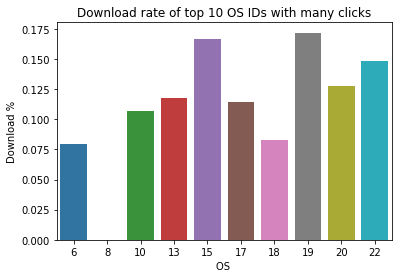

In [26]:
sns.barplot(x='os', y='download_%', data=os_click_download_df[:10])
plt.xlabel("OS ")
plt.ylabel("Download %")
plt.title("Download rate of top 10 OS IDs with many clicks")
plt.show()

# Apps

In [34]:
click_app_count = sample_df.groupby('app', as_index= False)['device'].aggregate('count').sort_values('device', ascending=False)
click_app_count = click_app_count.rename(columns={'device':'count'})
click_app_count = click_app_count[click_app_count['count'] > 2000]

click_app_count.head(10)

,app,count
2,3,18279
11,12,13198
1,2,11737
8,9,8992
14,15,8595
17,18,8315
13,14,5359
0,1,3135
12,13,2422
7,8,2004


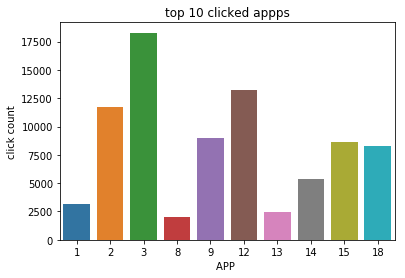

In [35]:
sns.barplot(x = 'app', y='count', data=click_app_count[:10])
plt.xlabel("APP ")
plt.ylabel("click count")
plt.title("top 10 clicked appps")
plt.show()

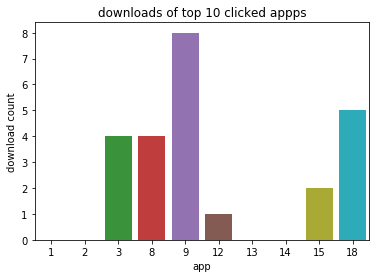

,app,count,download_count
0,3,18279,4
1,12,13198,1
2,2,11737,0
3,9,8992,8
4,15,8595,2
5,18,8315,5
6,14,5359,0
7,1,3135,0
8,13,2422,0
9,8,2004,4


In [36]:
d_cnt_app = sample_df.groupby('app', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
d_cnt_app = d_cnt_app[['app', 'is_attributed']]
d_cnt_app = d_cnt_app.rename(columns={'is_attributed': 'download_count'})

app_click_download_df = pd.merge(click_app_count, d_cnt_app)

sns.barplot(x='app', y='download_count', data=app_click_download_df[:10])
plt.xlabel("app")
plt.ylabel("download count")
plt.title("downloads of top 10 clicked appps")
plt.show()

app_click_download_df.head(10)

# channel

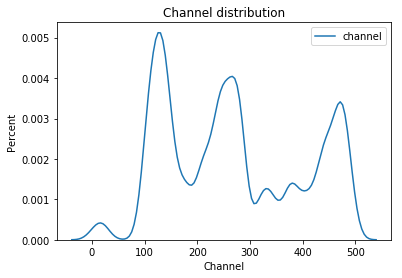

In [38]:
sns.kdeplot(sample_df['channel'])
plt.title('Channel distribution')
plt.xlabel('Channel')
plt.ylabel('Percent')
plt.show()

In [39]:
click_cnt_channel = sample_df.groupby('channel', as_index=False).count().sort_values(by='app', ascending=False)
click_cnt_channel = click_cnt_channel[['channel', 'app']]
click_cnt_channel = click_cnt_channel.rename(columns={'app': 'click_count'})
click_cnt_channel.head(10)

,channel,click_count
77,280,8114
64,245,4802
14,107,4543
146,477,3960
33,134,3224
67,259,3130
70,265,3013
40,153,2954
45,178,2936
24,121,2472


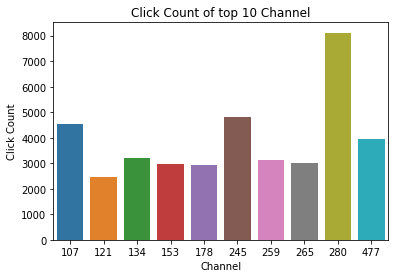

In [40]:
sns.barplot(x='channel', y='click_count', data=click_cnt_channel[:10])
plt.xlabel("Channel")
plt.ylabel("Click Count")
plt.title("Click Count of top 10 Channel")
plt.show()

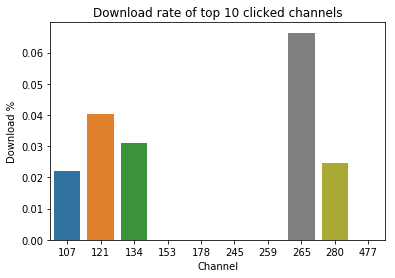

,channel,click_count,download_count,download_%
0,280,8114,2,0.024649
1,245,4802,0,0.000000
2,107,4543,1,0.022012
3,477,3960,0,0.000000
4,134,3224,1,0.031017
5,259,3130,0,0.000000
6,265,3013,2,0.066379
7,153,2954,0,0.000000
8,178,2936,0,0.000000
9,121,2472,1,0.040453


In [41]:
d_cnt_channel = sample_df.groupby('channel', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
d_cnt_channel = d_cnt_channel[['channel', 'is_attributed']]
d_cnt_channel = d_cnt_channel.rename(columns={'is_attributed': 'download_count'})

channel_click_download_df = pd.merge(click_cnt_channel, d_cnt_channel) 

channel_click_download_df['download_%'] = channel_click_download_df['download_count']/ channel_click_download_df['click_count'] * 100

sns.barplot(x='channel', y='download_%',data=channel_click_download_df[:10])
plt.xlabel("Channel")
plt.ylabel("Download %")
plt.title("Download rate of top 10 clicked channels")
plt.show()

channel_click_download_df.head(10)

## conclusion

 1. ip with large no. clicks is more likely to be fraud because it is not how normally people use it
 2. some device have many clicks but no downloads
 3. variables 'app','device' and 'os' are strongly correlated
 4. variables 'app' and 'channel' are related to fraud clicks

In [42]:
import numpy as np
import pandas as pd
import math
import time
import gc
from useful_methods import *

In [43]:
def print_duration (start_time, msg):
    print("[%d] %s" % (int(time.time() - start_time), msg))
    start_time = time.time()
    return start_time


    
def do_count( df, group_cols, agg_name, agg_type='uint32', show_max=False, show_agg=True ):
    if show_agg:
        print( "Aggregating by ", group_cols , '...' )
    gp = df[group_cols][group_cols].groupby(group_cols).size().rename(agg_name).to_frame().reset_index()
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    if show_max:
        print( agg_name + " max value = ", df[agg_name].max() )
    df[agg_name] = df[agg_name].astype(agg_type)
    gc.collect()
    return( df )

def do_countuniq( df, group_cols, counted, agg_name, agg_type='uint32', show_max=False, show_agg=True ):
    if show_agg:
        print( "Counting unqiue ", counted, " by ", group_cols , '...' )
    gp = df[group_cols+[counted]].groupby(group_cols)[counted].nunique().reset_index().rename(columns={counted:agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    if show_max:
        print( agg_name + " max value = ", df[agg_name].max() )
    df[agg_name] = df[agg_name].astype(agg_type)
    gc.collect()
    return( df )

def do_cumcount( df, group_cols, counted, agg_name, agg_type='uint32', show_max=False, show_agg=True ):
    if show_agg:
        print( "Cumulative count by ", group_cols , '...' )
    gp = df[group_cols+[counted]].groupby(group_cols)[counted].cumcount()
    df[agg_name]=gp.values
    del gp
    if show_max:
        print( agg_name + " max value = ", df[agg_name].max() )
    df[agg_name] = df[agg_name].astype(agg_type)
    gc.collect()
    return( df )

def do_mean( df, group_cols, counted, agg_name, agg_type='float32', show_max=False, show_agg=True ):
    if show_agg:
        print( "Calculating mean of ", counted, " by ", group_cols , '...' )
    gp = df[group_cols+[counted]].groupby(group_cols)[counted].mean().reset_index().rename(columns={counted:agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    if show_max:
        print( agg_name + " max value = ", df[agg_name].max() )
    df[agg_name] = df[agg_name].astype(agg_type)
    gc.collect()
    return( df )

def do_var( df, group_cols, counted, agg_name, agg_type='float32', show_max=False, show_agg=True ):
    if show_agg:
        print( "Calculating variance of ", counted, " by ", group_cols , '...' )
    gp = df[group_cols+[counted]].groupby(group_cols)[counted].var().reset_index().rename(columns={counted:agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    if show_max:
        print( agg_name + " max value = ", df[agg_name].max() )
    df[agg_name] = df[agg_name].astype(agg_type)
    gc.collect()
    return( df )


In [44]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }

In [45]:
train = pd.read_csv('train.csv', nrows=1000000, dtype=dtypes)

In [46]:
# Extracting new features
train['hour'] = pd.to_datetime(train.click_time).dt.hour.astype('uint8')
train['day'] = pd.to_datetime(train.click_time).dt.day.astype('uint8')

train = do_cumcount( train, ['ip', 'device', 'os'], 'app', 'X1', show_max=True ); gc.collect()
train = do_cumcount( train, ['ip'], 'os', 'X7', show_max=True ); gc.collect()
train = do_countuniq( train, ['ip'], 'channel', 'X0', 'uint8', show_max=True ); gc.collect()
train = do_countuniq( train, ['ip', 'day'], 'hour', 'X2', 'uint8', show_max=True ); gc.collect()
train = do_countuniq( train, ['ip'], 'app', 'X3', 'uint8', show_max=True ); gc.collect()
train = do_countuniq( train, ['ip', 'app'], 'os', 'X4', 'uint8', show_max=True ); gc.collect()
train = do_countuniq( train, ['ip'], 'device', 'X5', 'uint16', show_max=True ); gc.collect()
train = do_countuniq( train, ['app'], 'channel', 'X6', show_max=True ); gc.collect()
train = do_countuniq( train, ['ip', 'device', 'os'], 'app', 'X8', show_max=True ); gc.collect()
train = do_count( train, ['ip', 'day', 'hour'], 'ip_tcount', show_max=True ); gc.collect()
train = do_count( train, ['ip', 'app'], 'ip_app_count', show_max=True ); gc.collect()
train = do_count( train, ['ip', 'app', 'os'], 'ip_app_os_count', 'uint16', show_max=True ); gc.collect()
#chunk = do_var( chunk, ['ip', 'day', 'channel'], 'hour', 'ip_tchan_count', show_max=True ); gc.collect()
train = do_var( train, ['ip', 'app', 'os'], 'hour', 'ip_app_os_var', show_max=True ); gc.collect()

Cumulative count by  ['ip', 'device', 'os'] ...
X1 max value =  1860
Cumulative count by  ['ip'] ...
X7 max value =  6436
Counting unqiue  channel  by  ['ip'] ...
X0 max value =  93
Counting unqiue  hour  by  ['ip', 'day'] ...
X2 max value =  3
Counting unqiue  app  by  ['ip'] ...
X3 max value =  41
Counting unqiue  os  by  ['ip', 'app'] ...
X4 max value =  52
Counting unqiue  device  by  ['ip'] ...
X5 max value =  8
Counting unqiue  channel  by  ['app'] ...
X6 max value =  34
Counting unqiue  app  by  ['ip', 'device', 'os'] ...
X8 max value =  29
Aggregating by  ['ip', 'day', 'hour'] ...
ip_tcount max value =  6437
Aggregating by  ['ip', 'app'] ...
ip_app_count max value =  1725
Aggregating by  ['ip', 'app', 'os'] ...
ip_app_os_count max value =  519
Calculating variance of  hour  by  ['ip', 'app', 'os'] ...
ip_app_os_var max value =  2.0


53

In [47]:
'''train_X = train.as_matrix(columns=['app', 'device', 'os', 'channel', 'hour', 'day',
                                           'ip_tcount', 'ip_app_count',
                                           'ip_app_os_count', 'ip_app_os_var',
                                            'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])'''

train_y = train['is_attributed']
train.drop(columns=['ip','attributed_time', 'is_attributed','click_time'], axis=1, inplace=True)
train.head()

,app,device,os,channel,hour,day,X1,X7,X0,X2,X3,X4,X5,X6,X8,ip_tcount,ip_app_count,ip_app_os_count,ip_app_os_var
0,3,1,13,379,14,6,0,0,46,2,19,5,1,34,16,1,19,15,0.266667
1,3,1,19,379,14,6,0,0,42,3,20,8,1,34,11,1,23,7,0.571429
2,3,1,13,379,14,6,0,0,35,2,17,6,3,34,10,1,10,3,1.333333
3,14,1,13,478,14,6,0,0,81,2,31,18,6,26,24,1,69,20,0.200000
4,3,1,13,379,14,6,0,0,1,1,1,1,1,34,1,1,1,1,NaN


In [48]:
test = pd.read_csv('test.csv', dtype = dtypes, engine='c')

test['hour'] = pd.to_datetime(test.click_time).dt.hour.astype('uint8')
test['day'] = pd.to_datetime(test.click_time).dt.day.astype('uint8')

test = do_cumcount( test, ['ip', 'device', 'os'], 'app', 'X1', show_max=True ); gc.collect()
test = do_cumcount( test, ['ip'], 'os', 'X7', show_max=True ); gc.collect()
test = do_countuniq( test, ['ip'], 'channel', 'X0', 'uint8', show_max=True ); gc.collect()
test = do_countuniq( test, ['ip', 'day'], 'hour', 'X2', 'uint8', show_max=True ); gc.collect()
test = do_countuniq( test, ['ip'], 'app', 'X3', 'uint8', show_max=True ); gc.collect()
test = do_countuniq( test, ['ip', 'app'], 'os', 'X4', 'uint8', show_max=True ); gc.collect()
test = do_countuniq( test, ['ip'], 'device', 'X5', 'uint16', show_max=True ); gc.collect()
test = do_countuniq( test, ['app'], 'channel', 'X6', show_max=True ); gc.collect()
test = do_countuniq( test, ['ip', 'device', 'os'], 'app', 'X8', show_max=True ); gc.collect()
test = do_count( test, ['ip', 'day', 'hour'], 'ip_tcount', show_max=True ); gc.collect()
test = do_count( test, ['ip', 'app'], 'ip_app_count', show_max=True ); gc.collect()
test = do_count( test, ['ip', 'app', 'os'], 'ip_app_os_count', 'uint16', show_max=True ); gc.collect()
#test = do_var( test, ['ip', 'day', 'channel'], 'hour', 'ip_tchan_count', show_max=True ); gc.collect()
test = do_var( test, ['ip', 'app', 'os'], 'hour', 'ip_app_os_var', show_max=True ); gc.collect()
#test = do_mean( test, ['ip', 'app', 'os'], 'hour', 'ip_app_os_mean', show_max = True)

Cumulative count by  ['ip', 'device', 'os'] ...
X1 max value =  33732
Cumulative count by  ['ip'] ...
X7 max value =  182521
Counting unqiue  channel  by  ['ip'] ...
X0 max value =  130
Counting unqiue  hour  by  ['ip', 'day'] ...
X2 max value =  9
Counting unqiue  app  by  ['ip'] ...
X3 max value =  160
Counting unqiue  os  by  ['ip', 'app'] ...
X4 max value =  92
Counting unqiue  device  by  ['ip'] ...
X5 max value =  219
Counting unqiue  channel  by  ['app'] ...
X6 max value =  40
Counting unqiue  app  by  ['ip', 'device', 'os'] ...
X8 max value =  78
Aggregating by  ['ip', 'day', 'hour'] ...
ip_tcount max value =  40231
Aggregating by  ['ip', 'app'] ...
ip_app_count max value =  29231
Aggregating by  ['ip', 'app', 'os'] ...
ip_app_os_count max value =  6097
Calculating variance of  hour  by  ['ip', 'app', 'os'] ...
ip_app_os_var max value =  60.5


53

In [50]:
'''test_X = test.as_matrix(columns=['app', 'device', 'os', 'channel', 'hour', 'day','X1', 'X7', 'X0', 'X3', 'X4', 'X5', 'X6', 'X8','ip_tcount', 'ip_app_count',
                                     'ip_app_os_count', 'ip_app_os_var']
                                     '''
gc.collect()
test.drop(columns=['ip','click_id','click_time'], axis=1, inplace=True)
test.head()

,app,device,os,channel,hour,day,X1,X7,X0,X2,X3,X4,X5,X6,X8,ip_tcount,ip_app_count,ip_app_os_count,ip_app_os_var
0,9,1,3,107,4,10,0,0,34,6,14,16,1,40,3,34,28,1,NaN
1,9,1,3,466,4,10,0,0,90,6,36,26,6,40,14,403,289,5,4.700000
2,21,1,19,128,4,10,0,0,87,6,34,16,5,6,23,229,312,24,9.027174
3,15,1,13,111,4,10,0,0,92,6,36,8,5,27,23,239,42,23,15.873518
4,12,1,13,328,4,10,0,0,58,6,21,9,3,30,16,60,24,7,11.904762


In [52]:
# missing data
from sklearn.preprocessing import Imputer
imputer_train = Imputer(missing_values='NaN', strategy='mean', axis=0 )
imputer_train = imputer_train.fit(train)
train = imputer_train.transform(train)

imputer_test = Imputer(missing_values='NaN', strategy='mean', axis=0 )
imputer_test = imputer_test.fit(test)
test = imputer_test.transform(test)

In [53]:
#start_time = print_duration (start_time, "Finished training, start prediction")   
    # predict the propabilities for binary classes   
    
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

In [54]:
#asd = pd.DataFrame(data=train_X)
#train.head(30)
#asd1 = pd.DataFrame(data=test_X)
#asd1.head()
#asd.describe
classifier.fit(train, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

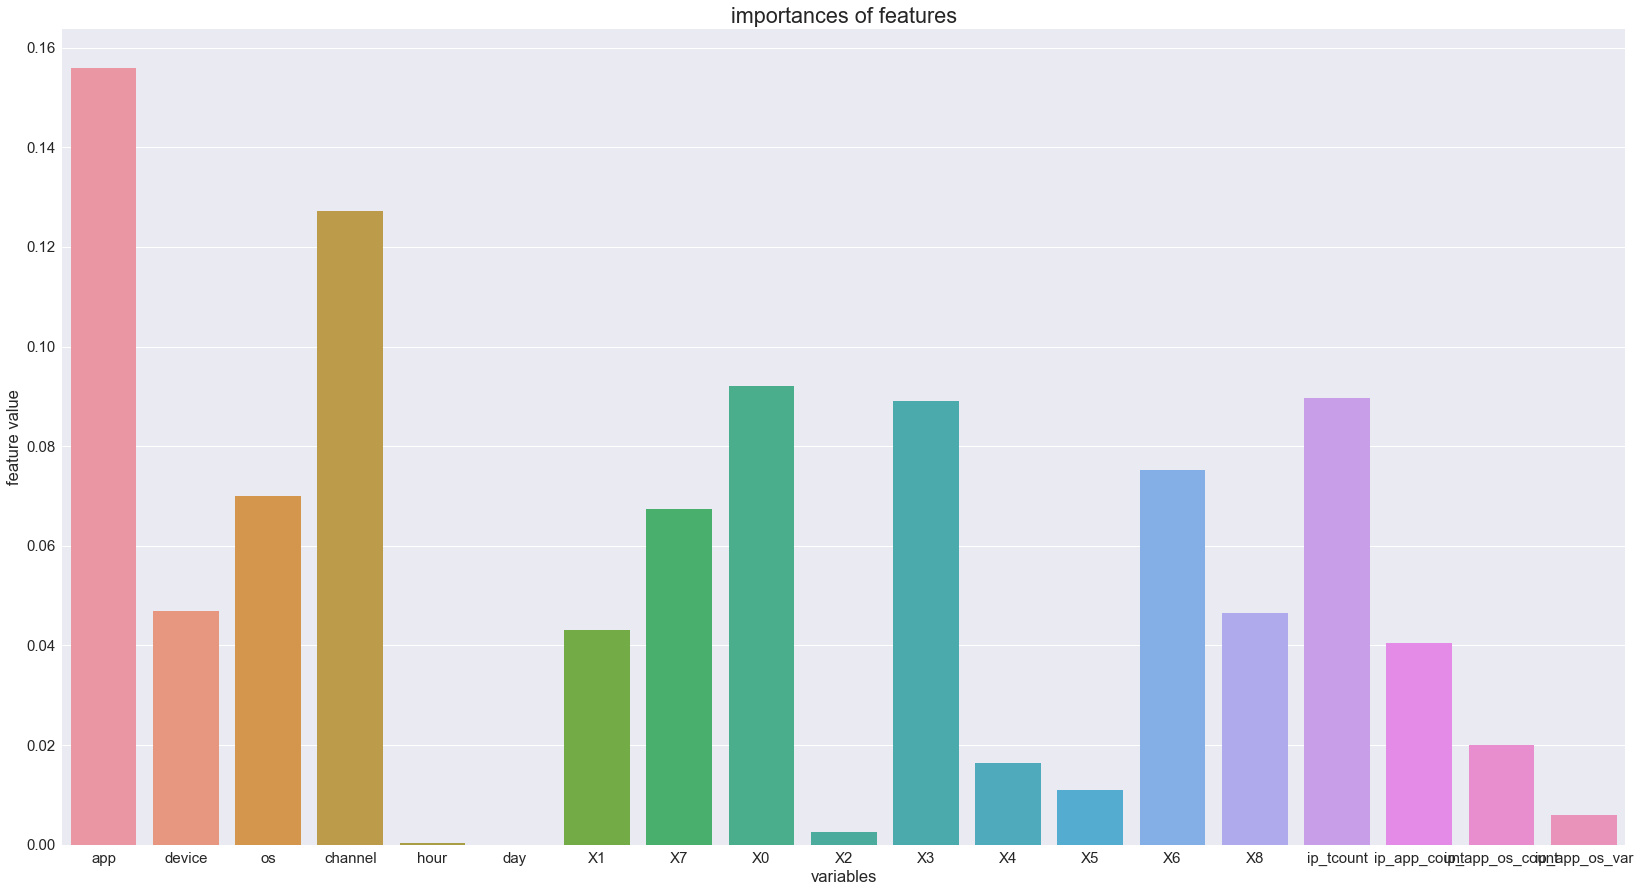

In [70]:
imp_val = classifier.feature_importances_
variables = ['app', 'device', 'os', 'channel', 'hour', 'day','X1', 'X7', 'X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ip_tcount', 'ip_app_count',
            'ip_app_os_count', 'ip_app_os_var']

feature_imp_df = pd.DataFrame({'variables':variables, 'imp_val': imp_val})

plt.figure(figsize=(28,15))
sns.barplot(x= 'variables', y= 'imp_val', data=feature_imp_df)
sns.set(font_scale = 1.8)
plt.xlabel("variables")
plt.ylabel("feature value")
plt.title("importances of features")
plt.show()


In [59]:
#gc.collect()
#random_forest_pred = classifier.predict_proba(test)
#gc.collect()
random_forest_pred[:,1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [57]:
rfo = pd.read_csv("sample_submission.csv")
gc.collect()
rfo['is_attributed'] = random_forest_pred[:,1]
gc.collect
rfo.to_csv("random_forest_output1.csv", index=False)
gc.collect()

0

In [176]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(max_depth = 0, objective='binary:logistic', subsample= 0.9, colsample_bytree = 0.7, colsample_bylevel= 0.7, min_child_weight=0, scale_pos_weight= 9)
xgb_classifier.fit(train, train_y)

In [174]:
xgb_pred = xgb_classifier.predict_proba(test)

In [ ]:
xgb_output = pd.read_csv("sample_submission.csv")
xgb_output['is_attributed'] = xgb_pred[:,1]
xgb_output.to_csv("xgb_output.csv", index=False)

In [177]:
from lightgbm import LGBMClassifier
lgb_classifier = LGBMClassifier(random_state=42, num_leaves=90, max_depth=7, learning_rate=0.08, min_split_gain=0.3, reg_alpha=0.3)
lgb_classifier.fit(train, train_y)

In [ ]:
lgb_pred = lgb_classifier.predict_proba(test)

In [ ]:
lgb_output = pd.read_csv("sample_submission.csv")
lgb_output['is_attributed'] = lgb_pred[:,1]
lgb_output.to_csv("lgb_output.csv", index=False)

In [ ]:
models = {
    'random_forest_output': {
        'score': 94.69,
        'df': random_forest_output 
    },
    'xgb_output': {
        'score': 98.11,
        'df': xgb_output
    },  
    'lgb_output': {
        'score': 97.33,
        'df': lgb_output
    }}

In [ ]:
harmonic_mean = 0
for df in models.keys() : 
    harmonic_mean += 1/(models[df]['df'].is_attributed)
    
harmonic_mean = count_models/harmonic_mean

In [ ]:
final_output = pd.read_csv("sample_submission.csv")
final_output['is_attributed'] = harmonic_mean
final_output.to_csv("final_output.csv", index=False)

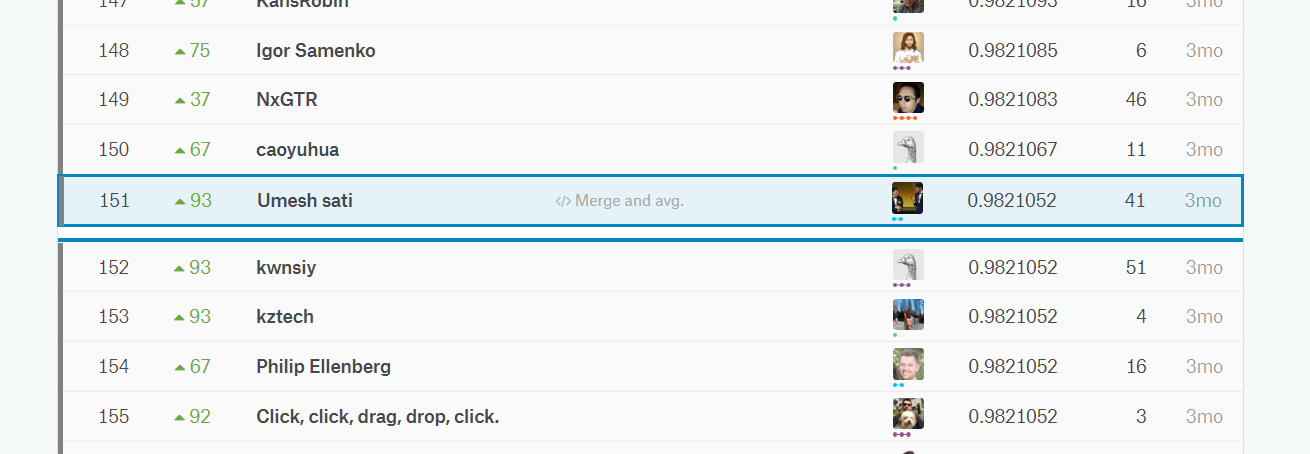

In [3]:
from IPython.display import Image
Image(filename='rank.png') 